<a href="https://colab.research.google.com/github/SiddardhaShayini/Performance-Analysis-of-Classification-Algorithms-on-Indicators-of-Heart-Disease-Dataset/blob/main/Performance_Analysis_of_Classification_Algorithms_on_Indicators_of_Heart_Disease_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [7]:
# Set plotting style for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [8]:
# Load the dataset from the provided GitHub URL
url = 'https://raw.githubusercontent.com/SiddardhaShayini/Performance-Analysis-of-Classification-Algorithms-on-Indicators-of-Heart-Disease-Dataset/refs/heads/main/heart.csv'

In [9]:
# Display the first few rows of the dataset for preview
print("Dataset Preview:")
display(data.head())

Dataset Preview:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [10]:
# Separate columns into numerical and categorical
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [11]:
# Handle missing values in numerical columns using SimpleImputer with 'mean' strategy
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

In [12]:
# Handle missing values in categorical columns using SimpleImputer with 'most_frequent' strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

In [13]:
# Check if missing values are handled
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [14]:
# Encode categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)  # One-hot encoding

In [15]:
# Separate features and target before encoding
target_column = 'HeartDisease'
X = data.drop(target_column, axis=1)
y = data[target_column]

In [16]:
# Apply one-hot encoding to the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

In [17]:
# Check columns after encoding
print("Columns after encoding:", X_encoded.columns.tolist())

Columns after encoding: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']


In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [19]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Initialize classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}

In [21]:
# Dictionary to store results
results = {}

In [23]:
# Function to train, evaluate, and store results
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        class_report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store results
        results[model_name] = {
            'Accuracy': accuracy,
            'AUC': auc,
            'Classification Report': class_report,
            'Confusion Matrix': conf_matrix
        }

        # Print performance metrics
        print(f"{model_name} Accuracy: {accuracy:.4f}")
        print(f"{model_name} AUC: {auc:.4f}")
        print(f"Classification Report:\n{class_report}")

        # Plot confusion matrix
        plt.figure(figsize=(7, 5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f"{model_name} Confusion Matrix")
        plt.show()



Training Logistic Regression...
Logistic Regression Accuracy: 0.8940
Logistic Regression AUC: 0.8574
Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      1787
         Yes       0.51      0.10      0.17       213

    accuracy                           0.89      2000
   macro avg       0.71      0.54      0.55      2000
weighted avg       0.86      0.89      0.86      2000



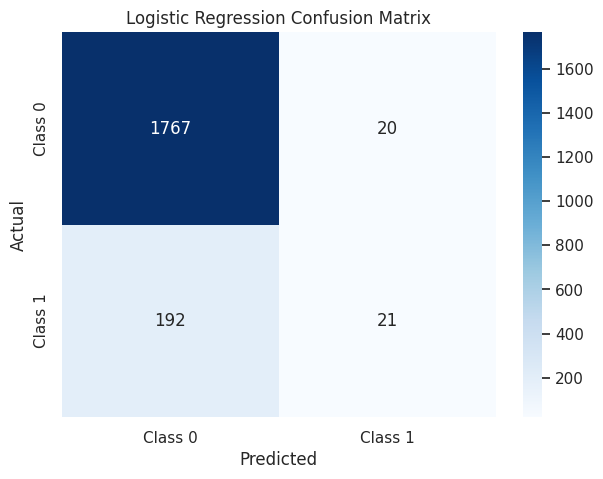


Training Random Forest...
Random Forest Accuracy: 0.8905
Random Forest AUC: 0.7972
Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      1787
         Yes       0.41      0.07      0.11       213

    accuracy                           0.89      2000
   macro avg       0.66      0.53      0.53      2000
weighted avg       0.85      0.89      0.85      2000



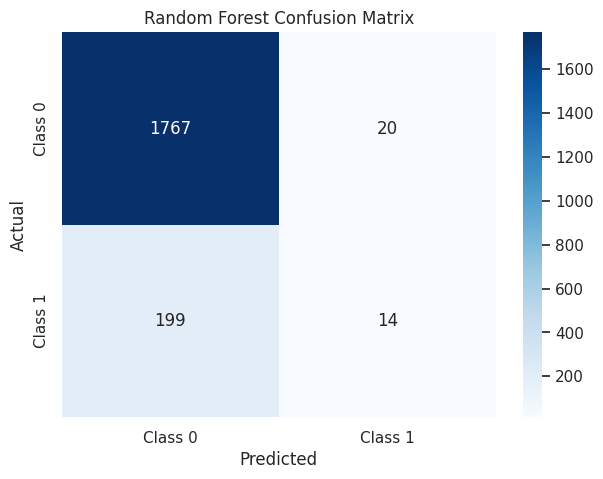


Training Support Vector Classifier...
Support Vector Classifier Accuracy: 0.8925
Support Vector Classifier AUC: 0.7051
Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      1787
         Yes       0.44      0.04      0.07       213

    accuracy                           0.89      2000
   macro avg       0.67      0.52      0.51      2000
weighted avg       0.85      0.89      0.85      2000



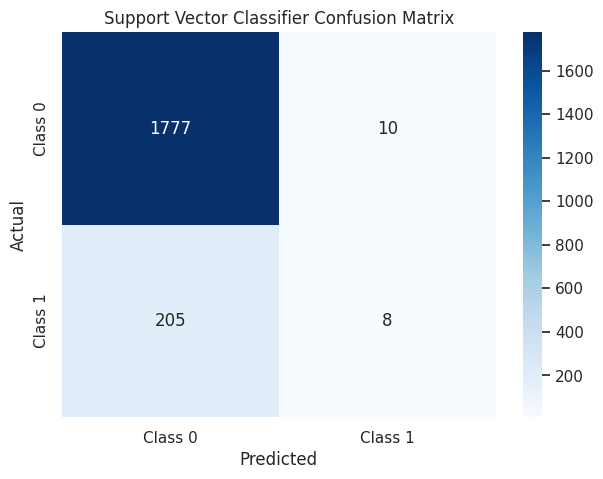

In [24]:
# Evaluate models
evaluate_models(models, X_train, X_test, y_train, y_test)

In [25]:
# Model Comparison for accuracy and AUC
performance_df = pd.DataFrame(results).T[['Accuracy', 'AUC']]
print("\nModel Comparison based on Accuracy and AUC:")
print(performance_df)


Model Comparison based on Accuracy and AUC:
                          Accuracy       AUC
Logistic Regression          0.894   0.85742
Random Forest               0.8905  0.797163
Support Vector Classifier   0.8925  0.705086


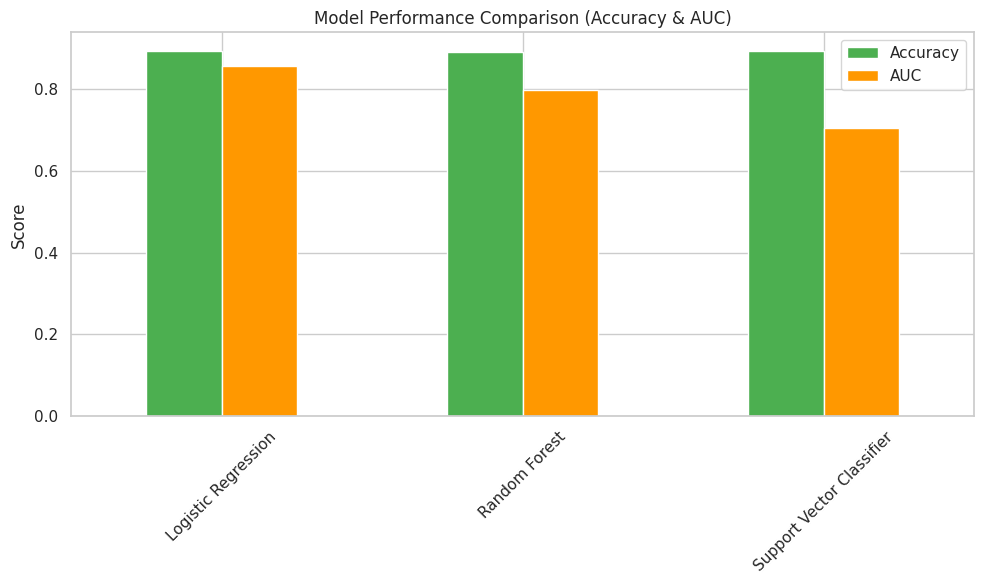

In [26]:
# Visualize model comparison
performance_df.plot(kind='bar', figsize=(10, 6), color=['#4CAF50', '#FF9800'])
plt.title('Model Performance Comparison (Accuracy & AUC)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Hyperparameter Tuning using GridSearchCV for the best performing model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

In [29]:
# Grid Search for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [30]:
# Print the best hyperparameters and the best score
print("\nBest Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest (after tuning):", grid_search_rf.best_score_)


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy for Random Forest (after tuning): 0.9064881518467356


In [31]:
# Use the best model to predict and evaluate on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

In [32]:
# Evaluate the best Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f"\nBest Random Forest Model Accuracy: {accuracy_rf:.4f}")
print(f"Best Random Forest Model AUC: {auc_rf:.4f}")


Best Random Forest Model Accuracy: 0.8910
Best Random Forest Model AUC: 0.8239


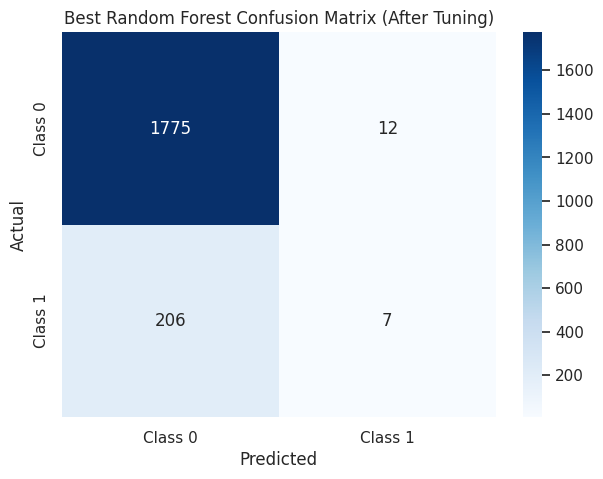

In [33]:
# Plot Confusion Matrix for best Random Forest Model
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Best Random Forest Confusion Matrix (After Tuning)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()